In [1]:
# ftp://ngs.sanger.ac.uk/production/ag1000g/phase1/AR3/variation/crosses/ar3/hdf5/ag1000g.crosses.phase1.ar3sites.3L.h5
# ftp://ngs.sanger.ac.uk/production/ag1000g/phase1/AR3/variation/crosses/ar3/hdf5/ag1000g.crosses.phase1.ar3sites.3R.h5


In [2]:
import pickle
import gzip
import random

import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd

%matplotlib inline

/home/tra/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Mendelian simulations

In [3]:
num_sims = 100000
num_ofs = 20

0


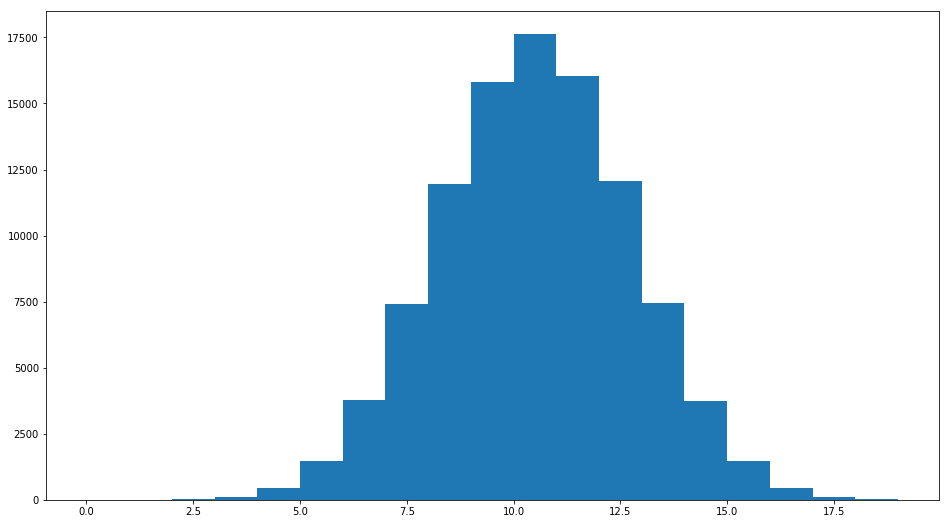

In [4]:
num_hets_AA_AT = []
for sim in range(num_sims):
    sim_hets = 0
    for ofs in range(20):
        sim_hets += 1 if random.choice([0, 1]) == 1 else 0
    num_hets_AA_AT.append(sim_hets)
    
fig, ax = plt.subplots(1,1, figsize=(16,9))
ax.hist(num_hets_AA_AT, bins=range(20))
print(len([num_hets for num_hets in num_hets_AA_AT if num_hets==20]))

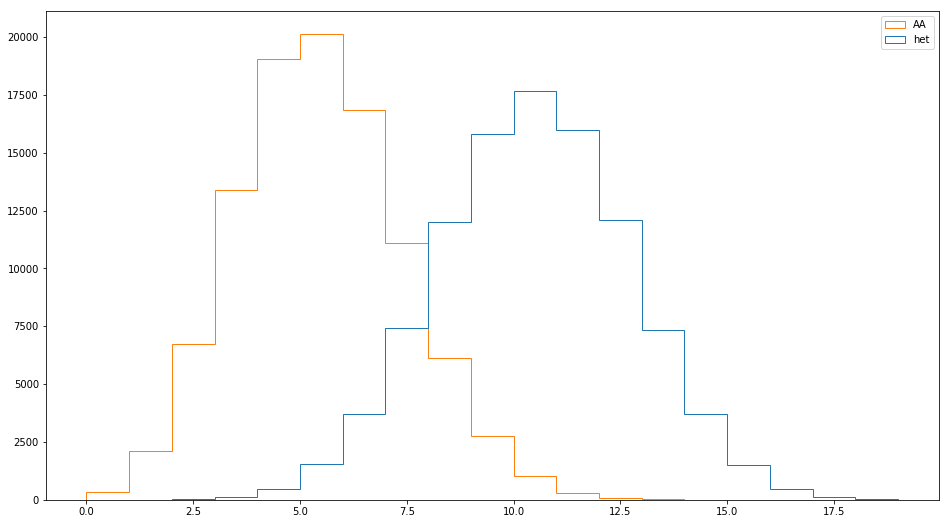

In [5]:
num_AAs_AT_AT = []
num_hets_AT_AT = []
for sim in range(num_sims):
    sim_AAs = 0
    sim_hets = 0
    for ofs in range(20):
        derived_cnt = sum(random.choices([0, 1], k=2))
        sim_AAs += 1 if derived_cnt == 0 else 0
        sim_hets += 1 if derived_cnt == 1 else 0
    num_AAs_AT_AT.append(sim_AAs)
    num_hets_AT_AT.append(sim_hets)
fig, ax = plt.subplots(1,1, figsize=(16,9))
ax.hist([num_hets_AT_AT, num_AAs_AT_AT], histtype='step', fill=False, bins=range(20), label=['het', 'AA'])
plt.legend()

# Data preparation

In [16]:
h5_3L = h5py.File('ag1000g.crosses.phase1.ar3sites.3L.h5', 'r')
samples_hdf5 = list(map(lambda sample: sample.decode('utf-8'), h5_3L['/3L/samples']))
print(samples_hdf5)

calldata_genotype = h5_3L['/3L/calldata/genotype']

MQ0 = h5_3L['/3L/variants/MQ0']
MQ = h5_3L['/3L/variants/MQ']
QD = h5_3L['/3L/variants/QD']
Coverage = h5_3L['/3L/variants/Coverage']
CoverageMQ0 = h5_3L['/3L/variants/CoverageMQ0']
HaplotypeScore = h5_3L['/3L/variants/HaplotypeScore']
QUAL = h5_3L['/3L/variants/QUAL']
FS = h5_3L['/3L/variants/FS']
DP = h5_3L['/3L/variants/DP']
HRun = h5_3L['/3L/variants/HRun']
ReadPosRankSum = h5_3L['/3L/variants/ReadPosRankSum']
my_features = {
    'MQ0': MQ0,
    'MQ': MQ,
    'QD': QD,
    'Coverage': Coverage,
    'CoverageMQ0': CoverageMQ0,
    'HaplotypeScore': HaplotypeScore,
    'QUAL': QUAL,
    'FS': FS,
    'DP': DP,
    'HRun': HRun,
    'ReadPosRankSum': ReadPosRankSum
}

num_features = len(my_features)
num_alleles = h5_3L['/3L/variants/num_alleles']
is_snp = h5_3L['/3L/variants/is_snp']
POS = h5_3L['/3L/variants/POS']


['AD0231-C', 'AD0232-C', 'AD0234-C', 'AD0235-C', 'AD0236-C', 'AD0237-C', 'AD0238-C', 'AD0239-C', 'AD0240-C', 'AD0241-C', 'AD0242-C', 'AD0243-C', 'AD0244-C', 'AD0245-C', 'AD0246-C', 'AD0247-C', 'AD0248-C', 'AD0249-C', 'AD0250-C', 'AD0251-C', 'AD0252-C', 'AD0253-C', 'AD0254-C', 'AD0255-C', 'AD0259-C', 'AD0260-C', 'AD0261-C', 'AD0262-C', 'AD0263-C', 'AD0265-C', 'AD0266-C', 'AD0267-C', 'AD0268-C', 'AD0269-C', 'AD0270-C', 'AD0271-C', 'AD0272-C', 'AD0273-C', 'AD0274-C', 'AD0275-C', 'AD0276-C', 'AD0305-C', 'AD0306-C', 'AD0309-C', 'AD0310-C', 'AD0311-C', 'AD0312-C', 'AD0313-C', 'AD0314-C', 'AD0315-C', 'AD0316-C', 'AD0317-C', 'AD0318-C', 'AD0319-C', 'AD0320-C', 'AD0322-C', 'AD0323-C', 'AD0347-C', 'AD0348-C', 'AD0351-C', 'AD0352-C', 'AD0353-C', 'AD0354-C', 'AD0355-C', 'AD0356-C', 'AD0357-C', 'AD0358-C', 'AD0359-C', 'AD0360-C', 'AD0361-C', 'AD0362-C', 'AD0363-C', 'AD0364-C', 'AD0365-C', 'AD0366-C', 'AD0367-C', 'AD0368-C', 'AD0369-C', 'AD0370-C', 'AD0438-C']


In [7]:
samples = pd.read_csv('samples.tsv', sep='\t')
print(samples['cross'].unique())
print(samples[samples['cross'] == 'cross-29-2'][['id', 'function']])
print(len(samples[samples['cross'] == 'cross-29-2']))

['cross-29-2' 'cross-36-9' 'cross-42-4' 'cross-46-9']
          id function
0   AD0231-C   parent
1   AD0232-C   parent
2   AD0234-C  progeny
3   AD0235-C  progeny
4   AD0236-C  progeny
5   AD0237-C  progeny
6   AD0238-C  progeny
7   AD0239-C  progeny
8   AD0240-C  progeny
9   AD0241-C  progeny
10  AD0242-C  progeny
11  AD0243-C  progeny
12  AD0244-C  progeny
13  AD0245-C  progeny
14  AD0246-C  progeny
15  AD0247-C  progeny
16  AD0248-C  progeny
17  AD0249-C  progeny
18  AD0250-C  progeny
19  AD0251-C  progeny
20  AD0252-C  progeny
21  AD0253-C  progeny
22


In [8]:
#compute mendelian errors (biallelic)
def compute_mendelian_errors(mother, father, offspring):
    num_errors = 0
    num_ofs_problems = 0
    if len(mother.union(father)) == 1:
        # Mother and father are homo and the same
        for ofs in offspring:
            if len(ofs) == 2:
                # Offspring is het
                num_errors += 1
                num_ofs_problems += 1
            elif len(ofs.intersection(mother)) == 0:
                # Offspring is homo, but opposite from parents
                num_errors += 2
                num_ofs_problems += 1
    elif len(mother) == 1 and len(father) == 1:
        # Mother and father are homo and different
        for ofs in offspring:
            if len(ofs) == 1:
                # Homo, should be het
                num_errors += 1
                num_ofs_problems += 1
    elif len(mother) == 2 and len(father) == 2:
        # Both are het, individual offspring can be anything
        pass
    else:
        # One is het, the other is homo
        homo = mother if len(mother) == 1 else father
        for ofs in offspring:
            if len(ofs) == 1 and ofs.intersection(homo):
                # homo, but not including the allele from parent that is homo
                num_errors += 1
                num_ofs_problems += 1
    return num_errors, num_ofs_problems

In [9]:
def acceptable_position_to_genotype():
    for i, genotype in enumerate(calldata_genotype):
        if is_snp[i] and num_alleles[i] == 2:
            if len(np.where(genotype == -1)[0]) > 1:
                # Missing data
                continue
            yield i

def acumulate(fun):
    acumulator = {}
    for res in fun():
        if res is not None:
            acumulator[res[0]] = res[1]
    return acumulator

In [10]:
def get_family_indexes(samples_hdf5, cross_pd):
    offspring = []
    for i, individual in cross_pd.T.iteritems():
        index = samples_hdf5.index(individual.id)
        if individual.function == 'parent':
            if individual.sex == 'M':
                father = index
            else:
                mother = index
        else:
            offspring.append(index)
    return {'mother': mother, 'father': father, 'offspring': offspring}

cross_pd = samples[samples['cross'] == 'cross-29-2']
family_indexes = get_family_indexes(samples_hdf5, cross_pd)

In [11]:
mother_index = family_indexes['mother']
father_index = family_indexes['father']
offspring_indexes = family_indexes['offspring']
all_errors = {}


def get_mendelian_errors():
    for i in acceptable_position_to_genotype():
        genotype = calldata_genotype[i]
        mother = set(genotype[mother_index])
        father = set(genotype[father_index])
        offspring = [set(genotype[ofs_index]) for ofs_index in offspring_indexes]
        my_mendelian_errors = compute_mendelian_errors(mother, father, offspring)
        yield POS[i], my_mendelian_errors
        if i % 1000000 == 0:
            print(POS[i])

mendelian_errors = acumulate(get_mendelian_errors)

2421115
3096162
3846533
5302690
6009332
6665994
7213924
8307787
8704574
9157921
10044890
10441893
10782114
11480576
12116288
12944845
13202384
13450790
13956615
14187307
14405595
14699420
14906103
15858699
16088023
16362214
16785061
17422143
17627792
18509178
18704624
18904148
19117221
19333809
19553484
19755761
19969942
20178659
20446009
21076256
21273645
21674541
22289048
22467282
23023517
23275264
23638929
23874445
24095034
24291473
24500102
24743095
25150745
25747004
25932067
26109886
26287473
26477908
26677007
26885445
27136205
27330486
28790677
29160063
29507338
29671058
29843141
30202217
30388109
30587277
30958807
31150370
31336742
31528546
31720254
31895137
32631438
33445984
33799034
34001333
34534402
34744318
35091909
35284531
35463884
35668458
35894145
36097011
36340198
36613181
36838309
37920759
38151197
38600050
38839024
39030190
39235743
39438503
39880257
40073744
40437316
40613858
40814391
41010998
41255445
41477898
41753173


In [12]:
len(mendelian_errors), len(list(filter(lambda x: x[0] > 0,mendelian_errors.values())))

(10905732, 541688)

In [13]:
pickle.dump(mendelian_errors, gzip.open('mendelian_errors.pickle.gz', 'wb'))

In [14]:
#To remove
mendelian_errors = pickle.load(gzip.open('mendelian_errors.pickle.gz', 'rb'))
feature_fit = np.load(gzip.open('feature_fit.npy.gz', 'rb'))

In [17]:
ordered_positions = sorted(mendelian_errors.keys())  # Not strictly needed
ordered_features = sorted(my_features.keys())  #XXX on code?
num_features = len(ordered_features)
feature_fit = np.empty((len(ordered_positions), len(my_features) + 1), dtype=float)
for column, feature in enumerate(ordered_features):  # 'Strange' order
    print(feature)
    current_hdf_row = 0
    for row, genomic_position in enumerate(ordered_positions):
        while POS[current_hdf_row] < genomic_position:
            current_hdf_row +=1
        feature_fit[row, column] = my_features[feature][current_hdf_row]
for row, genomic_position in enumerate(ordered_positions):
    feature_fit[row, num_features] = 1 if mendelian_errors[genomic_position][0] > 0 else 0


Coverage
CoverageMQ0
DP
FS
HRun
HaplotypeScore
MQ
MQ0
QD
QUAL
ReadPosRankSum


In [18]:
np.save(gzip.open('feature_fit.npy.gz', 'wb'), feature_fit, allow_pickle=False, fix_imports=False)
pickle.dump(ordered_features, open('ordered_features', 'wb'))